In [2]:
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from collections import Counter
import os
import glob
import re
import string

%matplotlib inline

In [118]:
articledf = pd.read_csv("../data/articles1.csv")
articledf.shape

(50000, 10)

In [119]:
articledf1 = pd.read_csv("../data/articles2.csv")
articledf2 = pd.read_csv("../data/articles3.csv")
newdf = articledf.append(articledf1)
finaldf = articledf.append(articledf2)
finaldf.shape

(92571, 10)

In [120]:
finaldf['publication'].value_counts()

Breitbart           23781
NPR                 11992
CNN                 11488
Washington Post     11114
Reuters             10710
New York Times       7803
Business Insider     6757
Vox                  4947
Guardian             3808
Atlantic              171
Name: publication, dtype: int64

In [121]:
finaldf['publication'] = finaldf['publication'] .map({'Breitbart': 2, 'NPR': 0, 'CNN': -1, 'Washington Post': -1, 
                                                     'Reuters': 0, 'New York Times': -1, 'Business Insider': 0, 'Vox': -2, 
                                                      'Guardian': 1, 'Atlantic': -1})

In [122]:
finaldf['publication'].value_counts()

-1    30576
 0    29459
 2    23781
-2     4947
 1     3808
Name: publication, dtype: int64

In [123]:
finaldf.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,-1,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,-1,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",-1,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",-1,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,-1,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [124]:
print(finaldf['publication'].value_counts())

-1    30576
 0    29459
 2    23781
-2     4947
 1     3808
Name: publication, dtype: int64


In [125]:
contentTest = finaldf.iloc[0]['content']
print(contentTest)

WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been d

In [126]:
print(len(contentTest.split()))

884


In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def nltk_sentiment(sentence):
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [128]:
tempdic = (nltk_sentiment(contentTest))

In [129]:
print(tempdic)

{'neg': 0.09, 'neu': 0.812, 'pos': 0.098, 'compound': 0.5189}


In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

newContent = porter.stem("republicans")
print(newContent)

republican


In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
sentences = sent_tokenize(contentTest)

In [23]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [25]:
overall = ""
for x in sentences: 
    stemmed = stemSentence(x)
    overall = overall + stemmed

washington — congression republican have a new fear when it come to their health care lawsuit against the obama administr : they might win . the incom trump administr could choos to no longer defend the execut branch against the suit , which challeng the administr ’ s author to spend billion of dollar on health insur subsidi for and american , hand hous republican a big victori on issu . but a sudden loss of the disput subsidi could conceiv caus the health care program to implod , leav million of peopl without access to health insur befor republican have prepar a replac . that could lead to chao in the insur market and spur a polit backlash just as republican gain full control of the govern . To stave off that outcom , republican could find themselv in the awkward posit of appropri huge sum to temporarili prop up the obama health care law , anger conserv voter who have been demand an end to the law for year . In anoth twist , donald J. trump ’ s administr , worri about preserv execut b

In [26]:
tempdic = (nltk_sentiment(overall))
print(tempdic)

{'neg': 0.064, 'neu': 0.847, 'pos': 0.089, 'compound': 0.9776}


In [30]:
import textatistic
print(textatistic.flesch_score(overall))
print(textatistic.flesch_score(contentTest))
print(textatistic.fleschkincaid_score(overall))
print(textatistic.fleschkincaid_score(contentTest))

63.98280259315908
48.6577272727273
11.314282188542828
13.304318181818184


In [130]:
#creating fake vectors out of data
def create_input_vectors(df, col_title):
    final = []
    for index, row in df.iterrows():
        text = row[col_title]
        sentences = sent_tokenize(text)
        overall = ""
        for x in sentences: 
            stemmed = stemSentence(x)
            overall = overall + stemmed
        
        temp = [0] * 7
        tempdic = (nltk_sentiment(text))
        temp[0] = len(text.split())
        temp[1] = tempdic['neg']
        temp[2] = tempdic['pos']
        temp[3] = tempdic['neu']
        try: 
            temp[4] = textatistic.flesch_score(text)
            temp[5] = textatistic.fleschkincaid_score(text)
        except:
            temp[4] = 60
            temp[5] = 10
        temp[6] = row["publication"]
        final.append(temp)
        
    return final

In [132]:
final = create_input_vectors(finaldf,"content")
fakeVec=np.array([np.array(xi) for xi in final])
print(fakeVec.shape)

(92571, 7)


In [133]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [134]:
X, Y = np.split(fakeVec, [6], axis=1)

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80)

In [136]:
model = Sequential()
hidden_layers = 3
nodes_per_layer = 100
model.add(Dense(nodes_per_layer, input_dim=6, kernel_initializer='normal', activation='relu'))
for i in range(hidden_layers):
        model.add(Dense(nodes_per_layer, activation='relu'))
        
model.add(Dense(1,  activation='relu'))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy', 'mae'])
model.fit(X_train, Y_train, epochs=2, batch_size=1)
print(model.summary())

Epoch 1/2
18514/18514 [==============================] - 38s 2ms/step - loss: 0.9804 - acc: 0.3216 - mean_absolute_error: 0.9804
Epoch 2/2
18514/18514 [==============================] - 39s 2ms/step - loss: 0.9801 - acc: 0.3216 - mean_absolute_error: 0.9801
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 101       
Total params: 31

In [137]:
y_pred_nn = model.predict(X_test)
mean_squared_error(Y_test[:, 0], y_pred_nn[:, 0])

1.6200494213916308

In [138]:
pred = pd.DataFrame(y_pred_nn)
pred[0].value_counts()

0.0    74057
Name: 0, dtype: int64

In [139]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, np.ravel(Y_train,order='C'))
predictions = logreg.predict(X_test)
score = logreg.score(X_test, Y_test)
print(score)

0.47159620292477417


c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc_feature_estimator = RandomForestClassifier(n_estimators=100, 
                                               random_state=21)
rfc_feature_estimator.fit(X_train, np.ravel(Y_train,order='C'))
print(rfc_feature_estimator.feature_importances_)

[0.25 0.14 0.14 0.14 0.17 0.17]


In [143]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, np.ravel(Y_train,order='C'))
predictions = clf.predict(X_test)
score = clf.score(X_test, Y_test)
print(score)

0.4806162820530132


In [144]:
pred = pd.DataFrame(predictions)
pred[0].value_counts()

-1.0    27888
 0.0    23718
 2.0    22036
-2.0      414
 1.0        1
Name: 0, dtype: int64

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[  155  2616   697     0   483]
 [  122 14022  6258     1  3993]
 [   52  7262 10286     0  5904]
 [   24  1490   976     0   526]
 [   61  2498  5501     0 11130]]


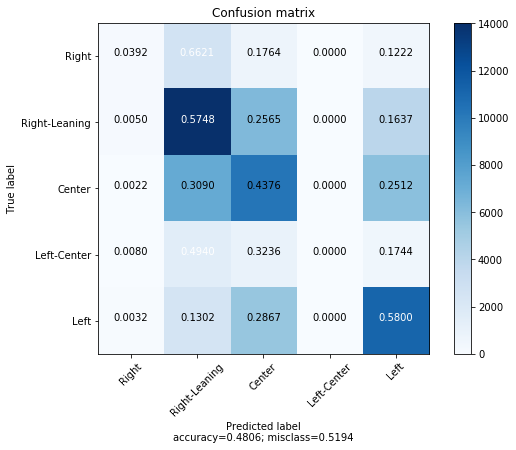

In [152]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(cm, ['Right','Right-Leaning','Center', 'Left-Center', 'Left'])

In [147]:
pred = pd.DataFrame(predictions)
pred[0].value_counts()

-1.0    27888
 0.0    23718
 2.0    22036
-2.0      414
 1.0        1
Name: 0, dtype: int64

In [148]:
vec = input_vectors(contentTest)

In [149]:
print(vec)

[884, 0.09, 0.098, 0.812, 48.6577272727273, 13.304318181818184]


In [86]:
arr = np.asarray(vec)
testscore = clf.predict(arr.reshape(1, -1))
print(testscore)

[0.]


In [150]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, np.ravel(Y_train,order='C'))
predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print(score)

0.4595649297162996


In [151]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, np.ravel(Y_train,order='C'))
predictions = tr.predict(X_test)
score = tr.score(X_test, Y_test)
print(score)

0.3810308276057631
